# TP1

    By: LUO Dihao

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## ex1

In [2]:
df = pd.read_csv("invest.txt", sep=' ')
df

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


In [3]:
df.dtypes

year          int64
gnp         float64
invest      float64
cpi         float64
interest    float64
dtype: object

## ex2

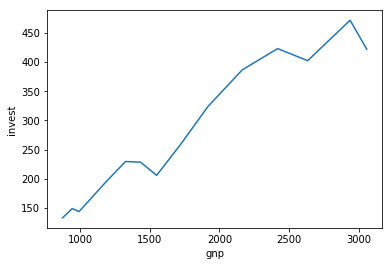

In [4]:
plt.plot(df['gnp'], df['invest'])
plt.xlabel('gnp')
plt.ylabel('invest')
plt.show()

## log-transforme

In [5]:
df['gnp_log'] = np.log(df['gnp'])
df['invest_log'] = np.log(df['invest'])
df

,year,gnp,invest,cpi,interest,gnp_log,invest_log
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000
5,1973,1326.4,229.8,105.75,6.44,7.190224,5.437209
6,1974,1434.2,228.7,115.08,7.83,7.268362,5.432411
7,1975,1549.2,206.1,125.79,6.25,7.345494,5.328361
8,1976,1718.0,257.9,132.34,5.50,7.448916,5.552572
9,1977,1918.3,324.1,140.05,5.46,7.559195,5.781052


## ex3

In [6]:
x = df['gnp_log']
y = df['invest_log']

In [7]:
n = y.size
p = 1

In [8]:
beta_1_estim = sum((x-x.mean())*(y-y.mean()))/sum((x-x.mean())*(x-x.mean()))

In [9]:
beta_0_estim = y.mean()-beta_1_estim*x.mean()

In [10]:
omega_carre_estim = sum((y-(beta_0_estim+beta_1_estim*x))
                        * (y-(beta_0_estim+beta_1_estim*x)))/(y.size-2)
omega_estim = np.sqrt(omega_carre_estim)

In [11]:
var_beta_0_estim = omega_carre_estim * \
    (1/y.size+x.mean()**2/sum((x-x.mean())**2))
var_beta_1_estim = omega_carre_estim/sum((x-x.mean())**2)

In [12]:
# determination coefficient
R = np.sqrt(sum((beta_0_estim+beta_1_estim*x-y.mean())**2) /
            sum((y-y.mean())**2))
print(R**2)

0.9627572956057855


In [13]:
print("beta_0_estim: ", beta_0_estim,
      "\nbeta_1_estim: ", beta_1_estim,
      "\nsd_beta_0_estim: ", np.sqrt(var_beta_0_estim),
      "\nsd_beta_1_estim: ", np.sqrt(var_beta_1_estim),
      "\nDetermination coefficient: ", R**2)

beta_0_estim:  -1.9635913352301833 
beta_1_estim:  1.015281401598871 
sd_beta_0_estim:  0.4095472716623082 
sd_beta_1_estim:  0.055383060354852805 
Determination coefficient:  0.9627572956057855


## ex4

In [14]:
t_stat = (beta_1_estim-0)/np.sqrt(var_beta_1_estim)

In [15]:
t_stat

18.33198445686668

In [16]:
from scipy.stats import t

In [17]:
degre_freedom = n-(p+1)

In [18]:
p_value = (1-t.cdf(t_stat, degre_freedom))*2

In [19]:
print("t-stat of slope: ", t_stat,
      "\nits p-value: ", p_value)

t-stat of slope:  18.33198445686668 
its p-value:  1.1363709973011282e-10


## ex5

In [20]:
x_est = 1000
y_est = np.exp(beta_0_estim + beta_1_estim*np.log(x_est))

print("For the GNP value 1000, \nthe necessary Investment is: ", y_est)

For the GNP value 1000, 
the necessary Investment is:  155.97942793105466


In [21]:
alpha = 1-0.9
print("Confidence interval: [",
      y_est/np.exp(t.ppf(1-alpha/2, n-2)
                   * omega_estim*np.sqrt(1/n+(np.log(x_est)-x.mean())**2/sum((x-x.mean())**2))),
      y_est*np.exp(t.ppf(1-alpha/2, n-2)*omega_estim*np.sqrt(1 /
                                                             n+(np.log(x_est)-x.mean())**2/sum((x-x.mean())**2))),
      "]"
      )
print("Prediction interval: [",
      y_est/np.exp(t.ppf(1-alpha/2, n-2)*omega_estim*np.sqrt(1 +
                                                             1/n+(np.log(x_est)-x.mean())**2/sum((x-x.mean())**2))),
      y_est*np.exp(t.ppf(1-alpha/2, n-2)*omega_estim*np.sqrt(1 +
                                                             1/n+(np.log(x_est)-x.mean())**2/sum((x-x.mean())**2))),
      "]")

Confidence interval: [ 146.67552673421926 165.87349286827552 ]
Prediction interval: [ 132.00238933412916 184.31167845087384 ]


## ex6

In [22]:
def ci(x_est):
    return t.ppf(1-alpha/2, n-2)*omega_estim*np.sqrt(1/n+((x_est)-x.mean())**2/sum((x-x.mean())**2))


def pi(x_est):
    return t.ppf(1-alpha/2, n-2)*omega_estim*np.sqrt(1+1/n+((x_est)-x.mean())**2/sum((x-x.mean())**2))


print(ci(x_est), pi(x_est))

97.35554574995622 97.35566939240823


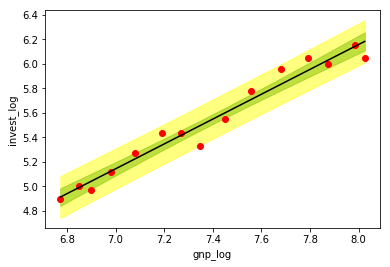

In [23]:
def f(x):
    return beta_0_estim+beta_1_estim*x


plt.plot(df['gnp_log'], df['invest_log'], 'ro',
         df['gnp_log'], f(df['gnp_log']), 'k')

plt.fill_between(df['gnp_log'], f(df['gnp_log'])-ci(df['gnp_log']),
                 f(df['gnp_log'])+ci(df['gnp_log']), color='green', alpha=0.5)

plt.fill_between(df['gnp_log'], f(df['gnp_log'])-pi(df['gnp_log']),
                 f(df['gnp_log'])+pi(df['gnp_log']), color='yellow', alpha=0.5)


plt.xlabel('gnp_log')
plt.ylabel('invest_log')
plt.show()

## ex7 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression().fit(x.values.reshape(-1, 1), y)

In [26]:
print("beta_1: ", reg.coef_[0],
      "\nbeta_0: ", reg.intercept_,
      "\nDetermination coefficient: ", np.sqrt(
          reg.score(x.values.reshape(-1, 1), y)),
      "\nInvestment predicted: ", np.exp(reg.predict(np.array([[np.log(1000)]])))[0])

beta_1:  1.015281401598871 
beta_0:  -1.9635913352301815 
Determination coefficient:  0.9812019647380378 
Investment predicted:  155.97942793105494


## ex8

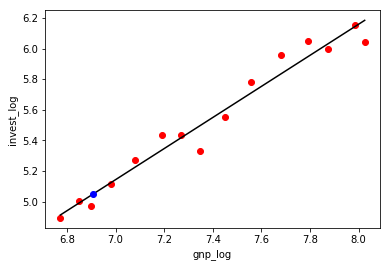

In [27]:
def f_new(x):
    return reg.coef_[0]*x+reg.intercept_


plt.plot(df['gnp_log'], df['invest_log'], 'ro',
         df['gnp_log'], f_new(df['gnp_log']), 'k')

plt.plot([np.log(1000)], [reg.predict(np.array([[np.log(1000)]]))], 'bo')

plt.xlabel('gnp_log')
plt.ylabel('invest_log')
plt.show()

## ex9

In [28]:
p = 2

In [29]:
df

,year,gnp,invest,cpi,interest,gnp_log,invest_log
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000
5,1973,1326.4,229.8,105.75,6.44,7.190224,5.437209
6,1974,1434.2,228.7,115.08,7.83,7.268362,5.432411
7,1975,1549.2,206.1,125.79,6.25,7.345494,5.328361
8,1976,1718.0,257.9,132.34,5.50,7.448916,5.552572
9,1977,1918.3,324.1,140.05,5.46,7.559195,5.781052


In [30]:
X = df[['gnp_log', 'interest']]
y = df['invest_log']

In [31]:
X['intercept'] = 1

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
X = X[['intercept', 'gnp_log', 'interest']]
X

,intercept,gnp_log,interest
0,1,6.772394,5.16
1,1,6.850126,5.87
2,1,6.900429,5.95
3,1,6.982492,4.88
4,1,7.078257,4.50
5,1,7.190224,6.44
6,1,7.268362,7.83
7,1,7.345494,6.25
8,1,7.448916,5.50
9,1,7.559195,5.46


In [33]:
gram_mat = np.dot(X.values.transpose(), X.values)/y.size

In [34]:
gram_mat

array([[ 1.        ,  7.38352141,  7.45266667],
       [ 7.38352141, 54.68323179, 55.94590287],
       [ 7.45266667, 55.94590287, 62.92371333]])

In [35]:
np.linalg.matrix_rank(gram_mat)

3

Yes, the associated Gram matrix is of full rank. 

## ex10

In [36]:
theta = np.linalg.inv(np.dot(X.values.transpose(), X.values)).dot(
    X.values.transpose()).dot(y.values)
theta

array([-2.18045473,  1.05124269, -0.00652888])

In [37]:
sigma_carre_estim = sum((y-np.dot(X.values, theta))**2)/(n-(p+1))
sigma_carre_estim

0.008192432955519776

In [38]:
C = sigma_carre_estim*np.linalg.inv(np.dot(X.values.transpose(), X.values))
C

array([[ 4.38772697e-01, -6.72457405e-02,  7.82053357e-03],
       [-6.72457405e-02,  1.04165249e-02, -1.29683702e-03],
       [ 7.82053357e-03, -1.29683702e-03,  2.35444629e-04]])

In [39]:
R = np.sqrt(sum((np.dot(X.values, theta)-y.mean())**2)/sum((y-y.mean())**2))
R**2

0.9633108306728397

In [40]:
t_stat_0 = (theta[0]-0)/np.sqrt(C[0][0])
t_stat_1 = (theta[1]-0)/np.sqrt(C[1][1])
t_stat_2 = (theta[2]-0)/np.sqrt(C[2][2])

degre_freedom = n-(p+1)
p_value_0 = (t.cdf(t_stat_0, degre_freedom))*2
p_value_1 = (1-t.cdf(t_stat_1, degre_freedom))*2
p_value_2 = (t.cdf(t_stat_2, degre_freedom))*2

print("for theta_0: \n\tsd=", np.sqrt(C[0][0]), " \n\tt-stat=", t_stat_0, " \n\tp value=", p_value_0,
      "\nfor theta_1: \n\tsd=", np.sqrt(
          C[1][1]), " \n\tt-stat=", t_stat_1, " \n\tp value=", p_value_1,
      "\nfor theta_2: \n\tsd=", np.sqrt(C[2][2]), " \n\tt-stat=", t_stat_2, " \n\tp value=", p_value_2,)

for theta_0: 
	sd= 0.6623991977963218  
	t-stat= -3.291753270788729  
	p value= 0.006438367050887691 
for theta_1: 
	sd= 0.10206137806191581  
	t-stat= 10.300102852640668  
	p value= 2.5995168484449493e-07 
for theta_2: 
	sd= 0.015344205065603458  
	t-stat= -0.42549479612609076  
	p value= 0.6780071418821165


p-value: $2\min\{\Pr(X\leq x|H),\Pr(X\geq x|H)\}$ for double tail event.

As the result shows, p-value for "interest" is too large, so it's more likely that we should accept the hypothsis theta_2=0. In other words, "interest" doesn't have much connection with "invest" so we should not take it into account.

## ex11

In [41]:
x_est = np.array([1, np.log(1000), 10])
y_est = np.dot(x_est, theta)

print("For the GNP value 1000 and Interest 10, \nthe necessary log(Investment) is: ", y_est)

For the GNP value 1000 and Interest 10, 
the necessary log(Investment) is:  5.015983730482028


In [42]:
alpha = 1-0.999
print("Confidence interval: [",
      np.exp(np.dot(x_est, theta)-t.ppf(1-alpha/2, n-p-1)
             * np.sqrt(sigma_carre_estim*np.dot(x_est.transpose(), np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est))),
      ", ",
      np.exp(np.dot(x_est, theta)+t.ppf(1-alpha/2, n-p-1)
             * np.sqrt(sigma_carre_estim*np.dot(x_est.transpose(), np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est))),
      "]"
      )
print("Prediction interval: [",
      np.exp(np.dot(x_est, theta)-t.ppf(1-alpha/2, n-p-1)
             * np.sqrt(sigma_carre_estim*(1+np.dot(x_est.transpose(), np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est)))),
      ", ",
      np.exp(np.dot(x_est, theta)+t.ppf(1-alpha/2, n-p-1)
             * np.sqrt(sigma_carre_estim*(1+np.dot(x_est.transpose(), np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est)))),
      "]")

Confidence interval: [ 103.56340529561987 ,  219.5946669999712 ]
Prediction interval: [ 87.68960327804044 ,  259.34626967310993 ]


In [43]:
alpha = 1-0.999
print("log(Investment):",
      "\nConfidence interval: [",
      np.dot(x_est, theta)-t.ppf(1-alpha/2, n-p-1)
      * np.sqrt(sigma_carre_estim*np.dot(x_est.transpose(),
                                         np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est)),
      ", ",
      np.dot(x_est, theta)+t.ppf(1-alpha/2, n-p-1)
      * np.sqrt(sigma_carre_estim*np.dot(x_est.transpose(),
                                         np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est)),
      "]"
      )
print("Prediction interval: [",
      np.dot(x_est, theta)-t.ppf(1-alpha/2, n-p-1)
      * np.sqrt(sigma_carre_estim*(1+np.dot(x_est.transpose(),
                                            np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est))),
      ", ",
      np.dot(x_est, theta)+t.ppf(1-alpha/2, n-p-1)
      * np.sqrt(sigma_carre_estim*(1+np.dot(x_est.transpose(),
                                            np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est))),
      "]")

log(Investment): 
Confidence interval: [ 4.640184036687451 ,  5.391783424276605 ]
Prediction interval: [ 4.473803343639628 ,  5.558164117324428 ]


## ex12

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [45]:
X_axe = X.iloc[:, 1]
Y_axe = X.iloc[:, 2]
W_axe = np.array([1]*15*15).reshape(15, 15)
X_axe, Y_axe = np.meshgrid(X_axe, Y_axe)
Z = X_axe.copy()
ci = X_axe.copy()
pi = X_axe.copy()

In [46]:
for i in range(n):
    for j in range(n):
        x_est = np.array([W_axe[i][j], X_axe[i][j], Y_axe[i][j]])
        Z[i][j] = np.dot(x_est, theta)
        ci[i][j] = t.ppf(1-alpha/2, n-p-1)*np.sqrt(sigma_carre_estim*np.dot(
            x_est.transpose(), np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est))
        pi[i][j] = t.ppf(1-alpha/2, n-p-1)*np.sqrt(sigma_carre_estim*(1+np.dot(
            x_est.transpose(), np.linalg.inv(np.dot(X.transpose(), X))).dot(x_est)))

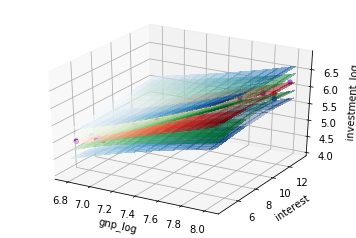

In [47]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X_axe, Y_axe, Z, cmap="Reds",
                       linewidth=0, antialiased=False, alpha=0.3)

surf_2 = ax.plot_surface(X_axe, Y_axe, Z+ci, cmap="Greens",
                         linewidth=0, antialiased=False, alpha=0.3)

surf_3 = ax.plot_surface(X_axe, Y_axe, Z-ci, cmap="Greens",
                         linewidth=0, antialiased=False, alpha=0.3)

surf_4 = ax.plot_surface(X_axe, Y_axe, Z+pi, cmap="Blues",
                         linewidth=0, antialiased=False, alpha=0.3)

surf_5 = ax.plot_surface(X_axe, Y_axe, Z-pi, cmap="Blues",
                         linewidth=0, antialiased=False, alpha=0.3)

ax.scatter(X.iloc[:, 1], X.iloc[:, 2], Z.diagonal(), c='red')

ax.scatter(X.iloc[:, 1], X.iloc[:, 2], y, c='blue')

ax.set_xlabel('gnp_log')
ax.set_ylabel('interest')
ax.set_zlabel('investment_log')

# Customize the z axis.
# ax.set_zlim(4,7)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## ex13 

In [49]:
reg = LinearRegression().fit(X[['gnp_log', 'interest']].values, y)

In [50]:
reg.coef_

array([ 1.05124269, -0.00652888])

In [51]:
reg.intercept_

-2.1804547259114004

So the estimated value is the same as those calculated "by hand".